In [1]:
%load_ext autoreload
%autoreload 2

# Boltz-2 results analysis

In [2]:
import os
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import ViennaRNA
import sys

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

__package__ = os.path.basename(module_path)

In [3]:
from src.utils.visualisation import show_rna_structure  


In [4]:
job_name = 'bzjob_4_hfq_tri_gfpmut3'
fn_job = f'boltz/jobs/{job_name}.yaml'

dir_result = f'boltz/results/boltz_results_{job_name}'

with open(fn_job, 'r') as f:
    job_config = yaml.safe_load(f)


In [5]:
entities = {}
len_seq_cummu = 0
for i, m in enumerate(job_config['sequences']):
    entity_type = list(m.keys())[0]
    m[entity_type]
    entities[m[entity_type]['id'] + '_' + entity_type] = {
        'sequence': m[entity_type]['sequence'],
        'type': entity_type,
        'index': i,
        'index_seq': len_seq_cummu
    }
    len_seq_cummu += len(m[entity_type]['sequence'])

entities

{'HfqA_protein': {'sequence': 'MAKGQSLQDPFLNALRRERVPVSIYLVNGIKLQGQIESFDQFVILLKNTVSQMVYKHAISTVVPSRPVSHHSNNAGGGTSSNYHHGSSAQNTSAQQDSEETE',
  'type': 'protein',
  'index': 0,
  'index_seq': 0},
 'HfqB_protein': {'sequence': 'MAKGQSLQDPFLNALRRERVPVSIYLVNGIKLQGQIESFDQFVILLKNTVSQMVYKHAISTVVPSRPVSHHSNNAGGGTSSNYHHGSSAQNTSAQQDSEETE',
  'type': 'protein',
  'index': 1,
  'index_seq': 102},
 'HfqC_protein': {'sequence': 'MAKGQSLQDPFLNALRRERVPVSIYLVNGIKLQGQIESFDQFVILLKNTVSQMVYKHAISTVVPSRPVSHHSNNAGGGTSSNYHHGSSAQNTSAQQDSEETE',
  'type': 'protein',
  'index': 2,
  'index_seq': 204},
 'GFPmu_rna': {'sequence': 'AUGAGCAAAGGCGAAGAACUGUUUACCGGCGUGGUGCCGAUUCUGGUGGAACUGGAUGGCGAUGUGAACGGCCAUAAAUUUAGCGUGAGCGGCGAAGGCGAAGGCGAUGCGACCUAUGGCAAACUGACCCUGAAAUUUAUUUGCACCACCGGCAAACUGCCGGUGCCGUGGCCGACCCUGGUGACCACCUUUAGCUAUGGCGUGCAGUGCUUUAGCCGCUAUCCGGAUCAUAUGAAACAGCAUGAUUUUUUUAAAAGCGCGAUGCCGGAAGGCUAUGUGCAGGAACGCACCAUUUUUUUUAAAGAUGAUGGCAACUAUAAAACCCGCGCGGAAGUGAAAUUUGAAGGCGAUACCCUGGUGAACCGCAUUGAACUGAAAGGCAUUGAUUUUAAAGAAGA

## PAE across RNA sequence

In [6]:
fn_pae = os.path.join(dir_result, 'predictions', job_name, f'pae_{job_name}_model_0.npz')
fn_plddt = os.path.join(dir_result, 'predictions', job_name, f'plddt_{job_name}_model_0.npz')

data = np.load(fn_pae)
pae = data['pae']

data = np.load(fn_plddt)
plddt = data['plddt']

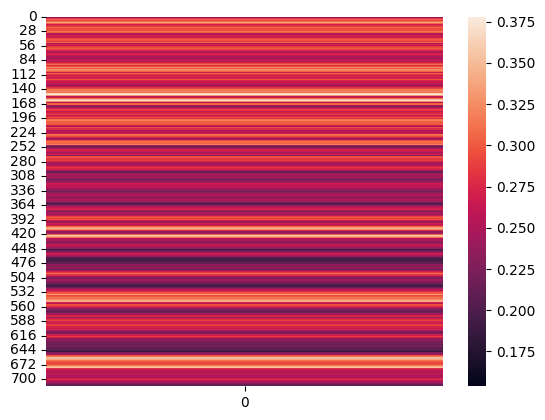

In [7]:
for k, v in entities.items():
    
    if v['type'] != 'rna':
        continue
    
    start = v['index_seq']
    end = start + len(v['sequence'])

    # sns.heatmap(pae[start:end, start:end], vmin=0, vmax=30)
    sns.heatmap(plddt[start:end, None])

## Structure visualisation

In [ ]:
s = ''
for k, v in entities.items():
    if v['type'] != 'rna':
        continue
    seq = v['sequence']
    folded = ViennaRNA.fold(seq, s)

    # v = Structure(structure=folded[0], sequence=seq)
    # v._params['resolution'] = 7
    # v.show()
    # v.savefig("example.png", show=True)

    show_rna_structure(folded[0], seq, resolution=5,
                       highlight_kwrgs={
                           'i': 44,
                           'j': 64
                       })

AttributeError: module 'ViennaRNA' has no attribute 'fold'